In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [6]:
from pandas.io.parsers.readers import csv
import pandas as pd

df = pd.read_csv('/content/MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,86.129997,86.309998,85.500000,85.949997,80.940384,22483800
1,2018-01-03,86.059998,86.510002,85.970001,86.349998,81.317078,26061400
2,2018-01-04,86.589996,87.660004,86.570000,87.110001,82.032799,21912000
3,2018-01-05,87.660004,88.410004,87.430000,88.190002,83.049835,23407100
4,2018-01-08,88.199997,88.580002,87.599998,88.279999,83.134583,22113000
...,...,...,...,...,...,...,...
1275,2023-01-26,243.649994,248.309998,242.000000,248.000000,248.000000,33454500
1276,2023-01-27,248.990005,249.830002,246.830002,248.160004,248.160004,26480800
1277,2023-01-30,244.509995,245.600006,242.199997,242.710007,242.710007,25867400
1278,2023-01-31,243.449997,247.949997,242.949997,247.809998,247.809998,26541100


In [7]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2018-01-02,85.949997
1,2018-01-03,86.349998
2,2018-01-04,87.110001
3,2018-01-05,88.190002
4,2018-01-08,88.279999
...,...,...
1275,2023-01-26,248.000000
1276,2023-01-27,248.160004
1277,2023-01-30,242.710007
1278,2023-01-31,247.809998


In [8]:
df['Date']

0       2018-01-02
1       2018-01-03
2       2018-01-04
3       2018-01-05
4       2018-01-08
           ...    
1275    2023-01-26
1276    2023-01-27
1277    2023-01-30
1278    2023-01-31
1279    2023-02-01
Name: Date, Length: 1280, dtype: object

In [10]:
from numpy.lib.shape_base import split
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

  datetime_object = str_to_datetime('2018-01-02')
  datetime_object

In [11]:
df

,Date,Close
0,2018-01-02,85.949997
1,2018-01-03,86.349998
2,2018-01-04,87.110001
3,2018-01-05,88.190002
4,2018-01-08,88.279999
...,...,...
1275,2023-01-26,248.000000
1276,2023-01-27,248.160004
1277,2023-01-30,242.710007
1278,2023-01-31,247.809998


In [12]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-12-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2018-01-02
1      2018-01-03
2      2018-01-04
3      2018-01-05
4      2018-01-08
          ...    
1275   2023-01-26
1276   2023-01-27
1277   2023-01-30
1278   2023-01-31
1279   2023-02-01
Name: Date, Length: 1280, dtype: datetime64[ns]

In [14]:
df.index = df.pop('Date')
df

,Close
Date,
2018-01-02,85.949997
2018-01-03,86.349998
2018-01-04,87.110001
2018-01-05,88.190002
2018-01-08,88.279999
...,...
2023-01-26,248.000000
2023-01-27,248.160004
2023-01-30,242.710007


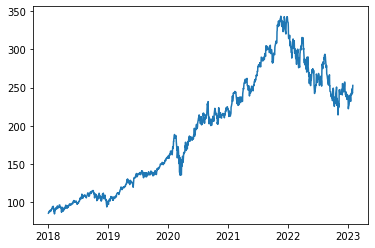

In [16]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [22]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2023-02-01', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
463,2023-01-26,242.580002,242.039993,240.610001,248.000000
464,2023-01-27,242.039993,240.610001,248.000000,248.160004
465,2023-01-30,240.610001,248.000000,248.160004,242.710007
466,2023-01-31,248.000000,248.160004,242.710007,247.809998


In [23]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((468,), (468, 3, 1), (468,))

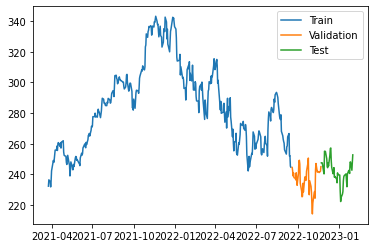

In [24]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
12/12 [==============================] - 3s 61ms/step - loss: 81308.6172 - mean_absolute_error: 283.8455 - val_loss: 55198.3203 - val_mean_absolute_error: 234.7987
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 80517.5312 - mean_absolute_error: 282.4514 - val_loss: 54435.5195 - val_mean_absolute_error: 233.1687
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 79438.8203 - mean_absolute_error: 280.5334 - val_loss: 53360.5625 - val_mean_absolute_error: 230.8522
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 77906.8906 - mean_absolute_error: 277.7902 - val_loss: 51847.2930 - val_mean_absolute_error: 227.5508
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 75725.0625 - mean_absolute_error: 273.8427 - val_loss: 49384.1367 - val_mean_absolute_error: 222.0721
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 71834.1719 - mean_absolute_error: 266.6021 - val_lo

12/12 [==============================] - 0s 3ms/step


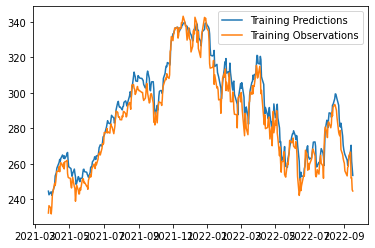

In [26]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 10ms/step


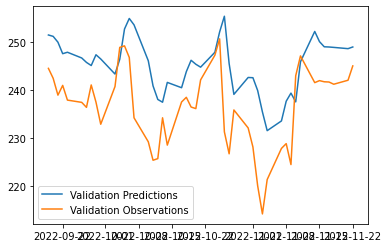

In [27]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 6ms/step


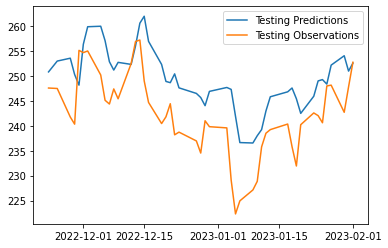

In [28]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

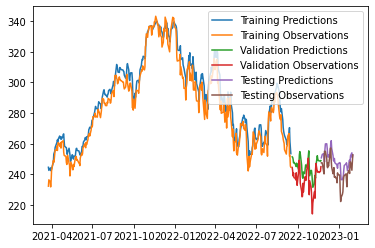

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [30]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 19ms/step


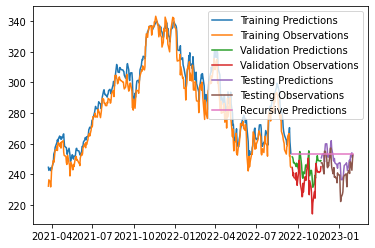

In [31]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])